In [163]:
from typing import Callable
import numpy as np
import cv2 as cv
import lib.image_utils as ImgUtils
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
def kmeans(
    image:np.ndarray,
    k: int = 2,
    max_iters:int = 100,
    initial_centroids: list = [],
    centroid_generate_fn: Callable = None,  # type: ignore
    error: float = 0.0000001
) -> np.ndarray:
    # defs
    euclidean_distance = lambda a, b: np.sqrt(np.sum((a - b)**2, axis=1))
    nearest_centroid = lambda pixel, centroids: np.argmin(euclidean_distance(pixel, centroids))
    has_converged = lambda centroids, centroids_new, error: np.mean(euclidean_distance(centroids, centroids_new)) <= error
    recompute_centroids = lambda clusters: np.array([np.mean(cluster, axis=0) for cluster in clusters])
    generate_random_centroids = lambda flattened_image, k: flattened_image[np.random.randint(0, flattened_image.shape[0], k)]
    get_image_dimensions = lambda img: (*img.shape, 1) if len(img.shape) == 2 else img.shape
    rebuild_pixels = lambda flattened_image, clusters, centroids, shape: flattened_image

    def create_clusters(flattened_image: np.ndarray, k: int, centroids: np.ndarray):
        idxs = np.apply_along_axis(func1d = nearest_centroid, axis = 1, arr = flattened_image, centroids = centroids)
        return np.array([flattened_image[idxs == i] for i in range(k)], dtype=np.ndarray)

    # initial params
    centroid_generate_fn = generate_random_centroids if centroid_generate_fn is None else centroid_generate_fn
    height, width, channels = get_image_dimensions(image)
    flattened = image.reshape((width * height, channels)).astype(float)
    centroids = np.array(initial_centroids) if len(initial_centroids) == k else centroid_generate_fn(flattened, k)
    clusters = []
    
    # algorithm
    for _ in range(max_iters):
        clusters = create_clusters(flattened, k, centroids)
        prev_centroids = centroids
        centroids = recompute_centroids(clusters)
        if has_converged(prev_centroids, centroids, error):
            break

    return rebuild_pixels(flattened, clusters, centroids, image.shape)

In [211]:
image1 = cv.imread('./images/bote.jpg', cv.IMREAD_GRAYSCALE)
image2 = cv.imread('./images/bote.jpg', cv.IMREAD_COLOR)

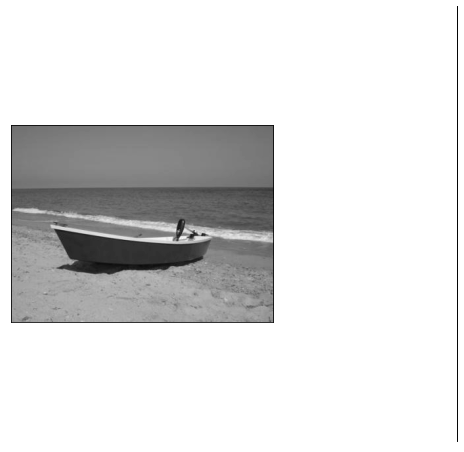

In [214]:
ImgUtils.imshow2(
    image1,
    kmeans(image1, 2)
)